# Week 1 
## Returns

**¿Why average returns is a bad indicator of returns?**

He provides an example involving a set of 12 monthly returns from two assets, each yielding an average monthly return of $1\%$ Firstly, there are differences in the behavior of both assets, given that one is more volatile than the other.

If you had initially invested $\$1000$
in both assets, you would end up with different amounts in the last period, even though the average return of both assets is the same. This demonstrates why the average return is not a reliable indicator.

**How do we characterize returns?**

A return is essentially a profit you make if you had bought that asset, so we calculate it using the formula for percentage variation in prices:

$R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}}$

Alternatively, you can express a return in the `1+r`format 

$1+ R_{t,t+1}=\frac{P_{t+1}}{P_{t}}$

This form offers computational advantage and is equivalent.

**How to include dividends in the returns formula?**

let's say over this intervening period of $P_{t+1}$, $P_{t}$ there was some divident that the stock generated. 

you have to remenber to add that back to $P_{t+1}$ because at time `t+1` not only do you have the current price of the stock but you also have the money that you got as a divident.

$R_{t,t+1}=\frac{P_{t+1}+D_{t,t+1}-P_{t}}{P_{t}}$

**How do we call a returns when i include dividents and how do we call a return when we don't include dividents?**

When I include dividends into the equation, I call it total returns. When I don't include dividends, I call it price returns.

you must be carefull when you download stock return information because the normally are expressed as total return not price returns.

### Returns in combine time period 



**How do we calculate the return of a combined time period?**

Let's say you have two time periods, T0 to T1 and T1 to T2. Each period has a return.

It's straightforward if we use the return format 1 + r. We just have to consider it as the compounding of the returns over time. So if you have R1 as the return between T0 and T1, and R2 as the return between T1 and T2, the formula to calculate the return over the combined time period, in this case, the return between T0 and T2, is:

$R_{t, t+2}=(1+R_{t,t+1})(1+R_{t+1,t+2})-1$

**How do we compare returns over different time periods?**

We do that with **annualization.**

`We use the annualized return for almost everything that we do.`

**What is meant by annualization?**

An annualized return is the return that you would get if the return that you're looking have continued for a year.

**Example

**If I have a monthly return of 1%, what would the annualized return be?**

$R_{12}=(1+0.01)^{12}-1$

**If you have a quarterly return of 1%, what would the annualized return be?**

$R_{4}=(1+0.01)^{4}-1$




In [2]:
import numpy as np

In [8]:
prices=pd.DataFrame({"BLUE":[2, 1.8, 2.3, 2.6],  #Diccionario
                    "ORANGE":[6, 5, 5.9, 8]})

A DataFrame is a type of data structure, which features both rows and columns. You can index each row and column in the DataFrame. To create a DataFrame in Python using the pandas library, one common method is to use a dictionary. In this dictionary, each key-value pair represents a column. The key is the column name, and the associated value is a list or array of values that will form the data in the column. The DataFrame we created earlier had two key-value pairs, corresponding to two columns named 'BLUE' and 'ORANGE'.

In pandas, alignment is fundamental when performing operations on DataFrames. This alignment is based on the indices of the rows and columns. Let's dive into this concept with an example:

In [12]:
prices.iloc[1:]/prices.iloc[:-1]-1

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,NaN,NaN


Here, iloc stands for "integer-location based indexing", which allows for selection by position.

`prices.iloc[1:]` selects all rows starting from the row with index 1 to the end.
`prices.iloc[:-1]` selects all rows from the start up to (but not including) the last row.

When we attempt the subtraction, pandas aligns rows based on their indices. For instance, the row with index 1 from prices.iloc[1:] is aligned with the row with index 1 from prices.iloc[:-1]. Since they are the same, the result for this row is zero. The other rows don't find a matching index in the opposing DataFrame, and thus, their result is NaN (Not a Number), indicating a missing value.

This behavior underscores the importance of being mindful of indices when performing operations on DataFrames in pandas

How do we solve it?
we use values it takes the dataframe pulls the values out and give you back a numpy matrix without the index stuff

In [13]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,BLUE,ORANGE
0,-0.100000,-0.166667
1,0.277778,0.180000
2,0.130435,0.355932


In the operation `prices.iloc[1:].values / prices.iloc[:-1]`, only the left-hand expression uses the values attribute, converting it to a numpy array. Although the right-hand expression remains a DataFrame, it won't attempt alignment with the left-hand side. This is because the left-hand numpy array doesn't possess index labels, negating any alignment considerations with the right-hand DataFrame. it works because now it's just positional division.

we're trying to compute the return formula by divide the prices to the same price shifting down one row, thre's actually a method in python that allows us to shift it right away 


In [17]:
r=prices/prices.shift(1)-1
r

,BLUE,ORANGE
0,NaN,NaN
1,-0.100000,-0.166667
2,0.277778,0.180000
3,0.130435,0.355932


essentially a return is a percentage change so we could use a method in DataFrame to compute percentage change

In [18]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,-0.100000,-0.166667
2,0.277778,0.180000
3,0.130435,0.355932


In [10]:
prices=pd.read_csv('Data/sample_prices.csv')

In [4]:
returns=prices.pct_change()

<AxesSubplot:>

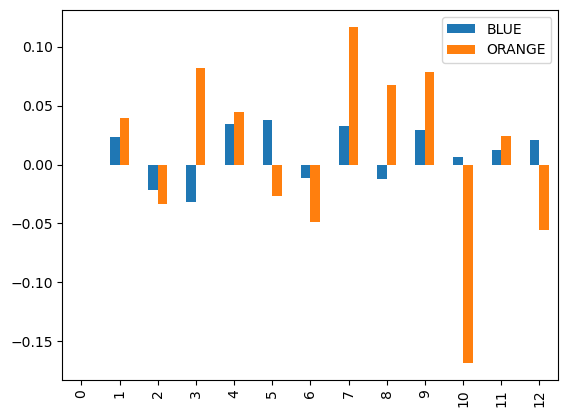

In [22]:
returns.plot.bar()

i like looks the returns plots, when we plot it with a barplot.

In [ ]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [24]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [29]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Risk and Reward

What do you understand when we talked about volatility?

When a serie of returns is more volatile than the another serie it means that the return serie deviate more often and more significantly from the mean than the other

$$\sigma^{2}=\frac{\sum_{i=1}^{N}(R_{i}-\bar{R})^{2}}{N}$$

The variance is the average of the square deviated returns, it isn't comparable with the return itself so we calculate de standard deviation takin the square rood of the variance that is more comparable with the returns.

$$\sigma=\sqrt{\frac{\sum_{i=1}^{N}(R_{i}-\bar{R})^{2}}{N}}$$

volatily could be affected by the time frame that you'r using, if you're using dialy data it will have a higher volatility than returns in monthly data, it's because  you have more data points

how do we get annualized volatility?

in order to compare volatility from different time frame we annalize the volatility.  it's as follow

$$\sigma_{A}=\sigma_{D}\times \sqrt{P}\$$

1. **$\sigma_{D}$:** This is the daily volatility, usually calculated as the standard deviation of daily returns over some historical period.
2. **$\sigma_{A}$:** This is the annual volatility, which provides an estimate of how much an investment is expected to fluctuate over a year.
3. **$\sqrt{P}$:** The square root of the number of trading days in a year..


how do we annalize returns of two different stocks with different volatility, one way is calculation the return on risk ratio or alternately 

$$Return on Risk Ratio=\frac{R_{A}}{\sigma_{A}}$$

where $R_{A}$ is the annualized return and $\sigma_{A}$ is the annualized volatility, the insight is how much return we get for unit of volatility.

there's a much more better indicator returns for two different stock with different volatility, it is the share ratio

$$sharpe ratio=\frac{R_{A}-R_{rf}}{\sigma_{A}}$$

we calculate the excess of volatility agains the annualized risk free rate $R_{rf}$ , the risk free rate could be the rate that you get if you invested in us treasurry bill, as in the return on risk ration. 


In [10]:
import pandas as pd
prices=pd.read_csv("Data/sample_prices.csv")
returns=prices.pct_change()
returns=returns.dropna()

In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [39]:
deviations=returns-returns.mean()
squared_deviations=deviations**2
variance=squared_deviations.mean()
volatility=variance**0.5
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

the number is difference because when we compute the standard deviation method in pandas we're using as denominator n-1 nor  n as we're doing with the formular. we already learned that topic in statistics it's related with sample and population.

shape is an atribute of a dataframe it gives you a tuple with the rows and colums. tuple is an ordered list that you can not change

In [43]:
number_obs=returns.shape[0]
variance=squared_deviations.sum()/(number_obs-1)
volatility=variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [44]:
annual_volatility=volatility*np.sqrt(12)
annual_volatility

BLUE      0.083060
ORANGE    0.275747
dtype: float64

the csv file is a monthly time series dataset of companies retuns organized by market cap segmentation since 1926 to 2018.

In [15]:
import data as d
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
returns=d.data_portafolio()

In [18]:
returns.std()

small cap    0.106288
large cap    0.053900
dtype: float64

In [19]:
import numpy as np
annualized_vol=returns.std()*np.sqrt(12)
annualized_vol

small cap    0.368193
large cap    0.186716
dtype: float64

<AxesSubplot:>

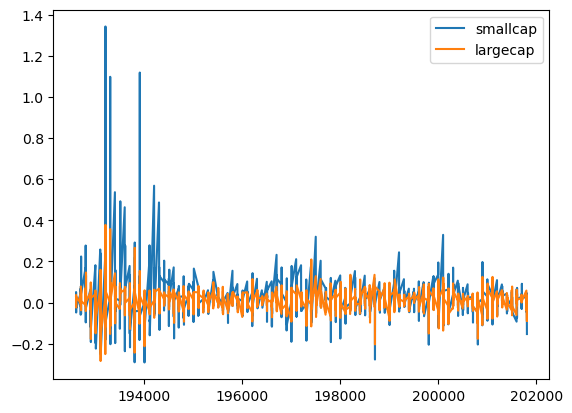

In [50]:
returns.plot.line()

In [53]:
annualized_return=(np.prod(1+returns))**(12/returns.shape[0])-1
annualized_return

smallcap    0.167463
largecap    0.092810
dtype: float64

In [55]:
annualized_return/annualized_vol

smallcap    0.454825
largecap    0.497063
dtype: float64

annualized return per unid of volatility

In [56]:
risk_free=0.03
sharpe_ratio=(annualized_return-risk_free)/annualized_vol
sharpe_ratio

smallcap    0.373346
largecap    0.336392
dtype: float64

we shouldn't use the risk free rate in that way, we should instead use the time series of the risk free rate.

small cap give you a superior risk adjusted return than large cap 

## Maximum drowdown

**What's maximum drowdown?**

volatility is not nesessarily a bad thing because if you deviate from the mean in the upside it's good for you. There's another measure called the maximum drowdown it represents the loss that you could have experienced if you'r unlucky enough to buy the asset at its very peak and you sold it at its botton. it's an interesting worst case scenario.

**How do i build a wealth index?

what would happen if i take a dollar or 100 dollars and invested it over time, just buy and hold.


**Give me pros and cons for the maximum drowdown measure?


In [2]:
import risk as r

C:\Users\pipeq\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
rt=r.data_portafolio()

when i use the pandas funtionallity read csv, i put as an input parse_dates=True. It means python will try to discover which variable among all variables is a date variable. when i take a look to the data, i figure out that the date variable doesn't look like a date variable.

In [4]:
rt.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

i'm just trying tell python that i'm using time series data. This is important because it allows me to get new python funtionallities that i couldn't get if python don't know that i'm using time series.

In [9]:
rt.loc["1940"] # loc is a manipulation function from pandas is a label base indexing

,small cap,large cap
1940-01,-0.0021,-0.0193
1940-02,0.0398,0.0092
1940-03,0.0025,0.0162
1940-04,-0.0100,0.0038
1940-05,-0.2914,-0.2126
1940-06,0.0380,0.0595
1940-07,0.0425,0.0280
1940-08,-0.0074,0.0134
1940-09,0.0338,0.0202
1940-10,-0.0074,0.0251


**Max drawdowns**

1. wealth index
2. compute previus peaks
3. compute drowdowns, which is the wealth value as a percentage of the previus peak

**what's weath index ?**

its the money that i would get, if i invested an hypothetical amount of money and hold it ultil the very end.  it's the value of the portafolio as it compounds over time.

In [45]:
wealth_index=1000*(1+rt["large cap"]).cumprod()

In [ ]:
the formula gives me the grown of the capital invested over time

In [46]:
previous_peaks=wealth_index.cummax()

cummax is cumulative maximum

In [47]:
drawdown=(wealth_index-previous_peaks)/previous_peaks

In [48]:
drawdown.min()

-0.8400375277943123

**¿where the maximum drawdown happens?**

In [49]:
drawdown.idxmin() # find index label of the row and column that contains the minimum value within the DataFrame

Period('1932-05', 'M')

what if i want to know what's the maximum drawdown since `1975`. we use min instead of max because as you can see, almost all drawdowns are negative.

In [50]:
drawdown["1975":].min()

-0.5280945042309304

In [51]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [17]:
import pandas as pd

def drawdown(returns_series: pd.Series):
    """
    Takes a series of assets returns. Computes and returns a data frame that contains:
    - wealth index
    - previous peaks
    - percent drawdowns
    """
    
    wealth_index = 1 * (1 + returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdowns": drawdowns
    })


When i put this as an input`returns_series: pd.Series`, i'm telling pyton that i'm working with a return serie as an input, but not any return series, it's is a serie of the kind pd.series.

When we compute all the things that we want it to send back, i'm going to send it back with the return statement, anything that i gave here is going to send back to the caller of the funtion.
what did i say i'm going send back, i'm going to send back a pandas data frame. i'm going to create a little dictionary with an . `entry per column`.

In [81]:
drawdown(rt["large cap"])

,Wealth,Peaks,Drawdowns
1926-07,1.032900e+03,1.032900e+03,0.000000
1926-08,1.071117e+03,1.071117e+03,0.000000
1926-09,1.078294e+03,1.078294e+03,0.000000
1926-10,1.052091e+03,1.078294e+03,-0.024300
1926-11,1.080498e+03,1.080498e+03,0.000000
...,...,...,...
2018-08,4.175915e+06,4.175915e+06,0.000000
2018-09,4.212246e+06,4.212246e+06,0.000000
2018-10,3.935501e+06,4.212246e+06,-0.065700
2018-11,4.035069e+06,4.212246e+06,-0.042062


double brackets means, the firts one is for indexation and the other one is because i'm giving a list.

<AxesSubplot:>

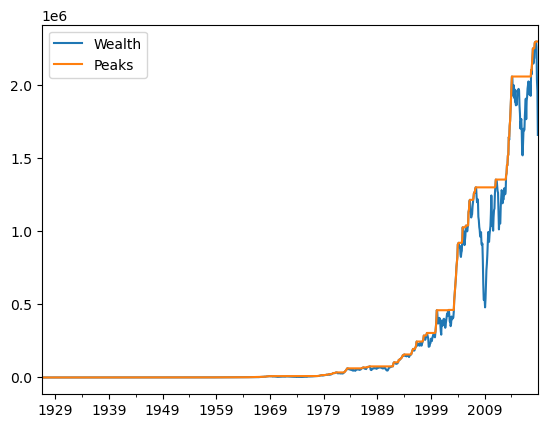

In [87]:
drawdown(rt["small cap"])[["Wealth","Peaks"]].plot.line()

<AxesSubplot:>

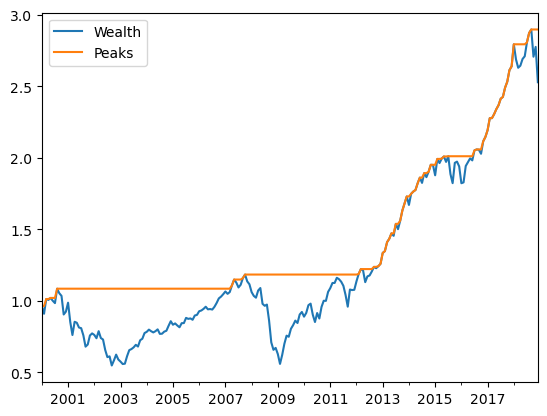

In [91]:
drawdown(rt["2000":]["large cap"])[["Wealth","Peaks"]].plot.line()

<AxesSubplot:>

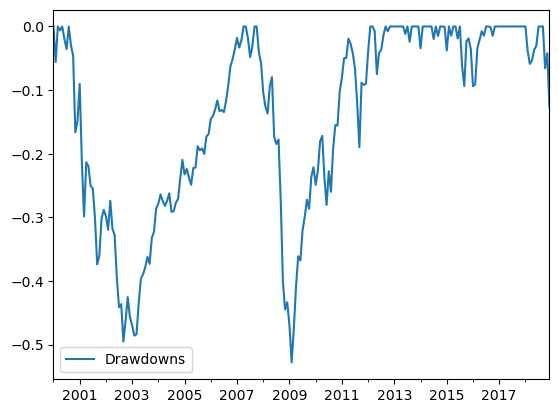

In [93]:
drawdown(rt["2000":]["large cap"])[["Drawdowns"]].plot.line()

In [18]:
drawdown(rt["2000":]["large cap"])[["Drawdowns"]].min()

Drawdowns   -0.528095
dtype: float64

In [19]:
drawdown(rt["2000":]["large cap"])[["Drawdowns"]].idxmin()

Drawdowns    2009-02
dtype: period[M]

## Beyond Gaussian Extreme Risk Estimates
When working in statistics, we often use the normal distribution. However, this assumption is not always applicable in the context of finance, because the normal distribution underestimates the likelihood of extreme events (tail events), which are an empirical regularity in financial time series. The normal distribution has the advantage of being characterized entirely by its first two moments: mean and variance. In contrast, when using a non-normal distribution to analyze time series, we need to consider higher moments, such as skewness and kurtosis.
"Skewness is a measure of asymmetry in a distribution. In a symmetric distribution, like the normal distribution, the probabilities of obtaining values below and above the mean are equal. Skewed distributions can be either positively or negatively skewed. In the context of financial returns, a positively skewed distribution suggests a higher likelihood of achieving returns above the average, but it also implies the possibility of negative returns. 

why normal distribution assuptiom doesn't alwais fit with financial series behavior?

$$
\begin{align*}
\text{Skewness of } R &= E\left[ \left( \frac{R - E(R)}{\sqrt{\text{Var}(R)}} \right)^3 \right] \\
\text{Where:} \\
E(R) & \text{ is the expected return.} \\
\text{Var}(R) & \text{ is the variance of the return.} \\
E[\cdot] & \text{ denotes the expected value.}
\end{align*}
$$

Kurtosis is a measure of the thickness of the tails in a distribution. It is the fourth moment of a distribution. The kurtosis in a normal distribution is 3. Therefore, if we have a kurtosis higher than 3, it means that the distribution is a fat-tailed distribution.".
$$
\text{Kurtosis of } R = E\left[ \left( \frac{R - E(R)}{\sqrt{\text{Var}(R)}} \right)^4 \right]
$$

Jaque vera test for normality of returns
$$
\text{Jarque-Bera Test: } JB = \frac{n}{6} \left( S^2 + \frac{1}{4} (K - 3)^2 \right)
$$
$
\text{where:} \\
n = \text{number of observations} \\
S = \text{sample skewness} \\
K = \text{sample kurtosis}
$
The null hypothesis for normally distributed returns states that the skewness is zero and the excess kurtosis is zero. The test uses a chi-squared distribution

**Semi deviation**

What bothers investors is when returns deviate from the mean on the downside. Semi-deviation measures the volatility of the subsample of returns that fall below the mean

$$
\text{Semi-Deviation} = \sqrt{\frac{\sum_{r_i < \mu} (r_i - \mu)^2}{N}}$$
$
\text{Where:} \\
r_i = \text{each individual return in the dataset} \\
\mu = \text{mean of all returns in the dataset} \\
N = \text{number of returns below the mean}
$

## VaR
maxiximum loss that can occur to a given portafolio given a level of confidence and a period; normaly we use 99% level of confidence. They say something like a maximum loss that can occur and it will wipe out the entirely portafolio.we calcule the return distribution, later we drop out the 1% worst cases then we calcule the worst case.

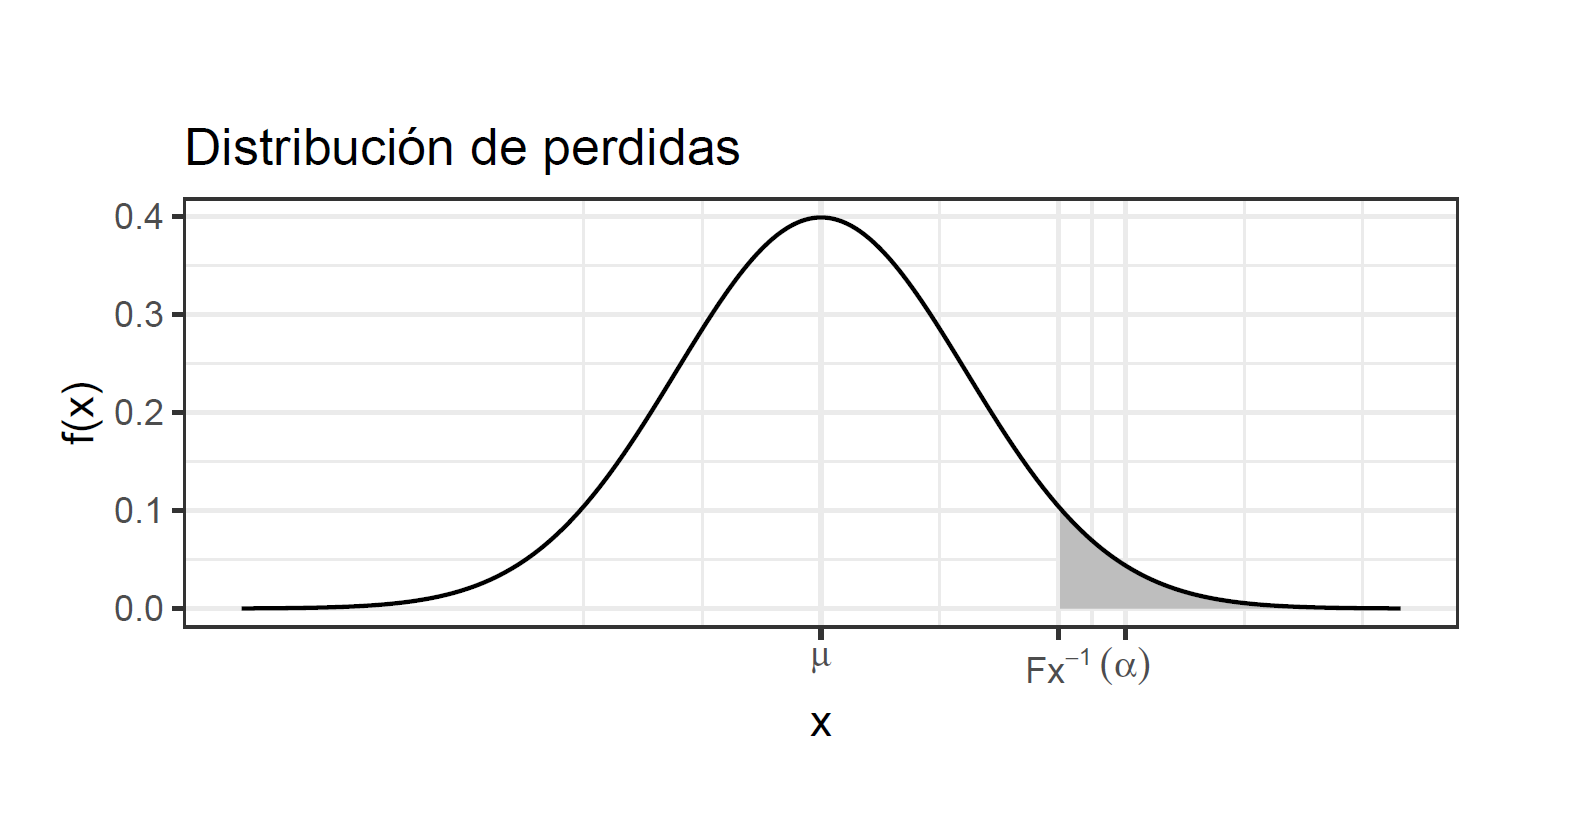
*Source: Risk Course, EAFIT*
## CVaR
The expected loss beyond VaR (Value at Risk) is the average of distribution beyond the Value at Risk threshold. The negative sign in the formula is used because we compute Value at Risk as a positive number.
$$
CVaR = -\mathbb{E}[R | R \leq -VaR] = \frac{-\int_{-\infty}^{-VaR} x \cdot f_R(x) dx}{F_R(-VaR)}
$$

$f_r(X)$ is PDF, and F_r(x) is CDF

ways of calculate the VaR?

We select the method that is most suitable for each case:

- **Historical Method:** In this approach, we use historical returns. Given a level of confidence, for example, 99%, we exclude the worst 1% of returns. It's the worst return within this 99%, representing the worst possible outcome. We don't make any assumptions about the return distribution, so we don't worry about mis-specifying the distribution. However, it's sensitive to the sample period, leading to sample risk.

past is equal to future

- **Parametric Gaussian:** This method addresses the sample risk by making an assumption about the sample distribution. It's 'parametric' because we estimate parameters. We can characterize the entire distribution with its mean and variance. To calculate VaR, we look up the alpha quantile for the standard normal distribution, which provides the estimates needed

we shouldn't treat what we observe literally, this is a sample of a larger population and it could played out in many different ways. for that reason we assume a serie of returns that follows  gaussian distribution.


Consider $Z_{\alpha}$ the $\alpha$-quantile of the standard normal distribution

For example $Z_{\alpha} = -1.65$ at 5% (actually 4.95%)

$$
\int_{-\infty}^{z_{\alpha}} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) dx = \alpha
$$


$$
\Pr\left(\frac{R_p - \mu_p}{\sigma_p} \leq z_{\alpha}\right) = \alpha \iff \Pr(R_p \leq \mu_p + z_{\alpha}\sigma_p) = \alpha
$$


it's is a proof of only one tail

this is just a cdf with all the properties. $Z_{\alpha}$ is the outcome  where there's only  a  $\alpha$ percent change of getting a value below  $Z_{\alpha}$ ; it's just the area under the curve of the standard normal distribution. We work with normalized returns distribution

- **Non Gaussian**
$
\textbf{DEFINE} \quad \hat{F}(x) = P(X > x) = 1 - F(x)
$

$$
\textbf{PARETO} \quad \hat{F}_\alpha(x) = x^{-\alpha}
$$

$$
\textbf{STUDENT WITH} \quad \alpha > 0 \quad \textbf{DEGREES OF FREEDOM} \quad \hat{F}_\alpha(x) \sim \alpha^{(\alpha-1)/2} x^{-\alpha}
$$

$$
\textbf{LOGGAMMA} \quad \hat{F}_{\alpha,\beta}(x) \sim x^{-\alpha} (\log x)^{\beta-1}
$$

$$
\textbf{FRECHET} \quad \hat{F}_\alpha(x) = 1 - e^{-x^{-\alpha}}
$$


specification risk, it's the risk of specifyin wrong the model

- **Cornish fisher**

this is the most commont way of doing VaR
$$
\textbf{CORNISH-FISHER (1937) EXPANSION}
$$

$$
\tilde{z}_{\alpha} = z_{\alpha} + \frac{1}{6}(z_{\alpha}^2 - 1)S + \frac{1}{24}(z_{\alpha}^3 - 3z_{\alpha})(K - 3) - \frac{1}{36}(2z_{\alpha}^3 - 5z_{\alpha})S^2
$$

$$
\text{VaR}_{\text{mod}}(1 - \alpha) = -(\mu + \tilde{z}_{\alpha} \sigma)
$$


We don't use any specific distribution; instead, we use the Cornish-Fisher expansion to relate $\tilde{z}_{\alpha}$ of a non-Gaussian distribution with $z_{\alpha}$ of a Gaussian distribution. It's a function we're expressing, but we're incorporating skewness and kurtosis. This Value at Risk (VaR) is typically higher than the VaR of a Gaussian distribution. It represents a compromise between sample risk and model risk.


In [181]:
#Lab
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
import pandas as pd
import risk as r
import data as d
import scipy.stats

In [183]:
## Deviations form normality

## Data from edhec about  returns of head funds. he says head funds strategies
hfi=d.data_risk()

In [184]:
hfi.()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022
2018-10,-0.0073,-0.0314,-0.0158,-0.0315,-0.0129,-0.0257,-0.0023,-0.0096,-0.0402,-0.0080,-0.0109,0.0237,-0.0269
2018-11,-0.0068,-0.0053,-0.0193,0.0120,-0.0211,-0.0034,-0.0067,-0.0087,-0.0044,0.0119,-0.0063,-0.0021,-0.0071


In [125]:
result=pd.concat([hfi.mean(),hfi.median(), hfi.mean()>hfi.median()],axis=1)
result.columns = ['Mean', 'Median', 'Mean > Median']
result

,Mean,Median,Mean > Median
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [126]:
r.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [192]:
r.skewness(hfi["2009":]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [127]:
r.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [193]:
r.kurtosis(hfi["2000":]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64

In [128]:
hfi.aggregate(r.normal_test)


Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [66]:
# Standard Deviation of population
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [130]:
## Semideviation
hfi[hfi<0].std(ddof=0).sort_values()
## We use boolean mask

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

In [188]:
r.semideviation(hfi["2009":"2018"]).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [131]:
#History VaR
#VaR at 5% 
import numpy as np
import pandas as pd

def var_historic(r, level=0.05):
    """
    Calculates the Value at Risk (VaR) using the historical method.
    - r: pd.Series or pd.DataFrame representing returns.
    - level: The percentile level to calculate VaR (default 5%).
    Returns VaR values for each column in DataFrame or a single value for Series.
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level * 100)
    else:
        raise TypeError("Expected r to be a pd.Series or pd.DataFrame")


Explain the sintax of the funtion?
what aggregate function does? if i gonna call some  funtion over every column of the dataframe.
when we call VaR the first thing it's going to check if the thing it is called with is a DataFrame, if it does, it gonna call the funtion on every column of the data frame, next time it's going to be called it isn't going to be a DataFrame.

if it's called with something that is not a DataFrame we can check if it's a serie

In [75]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

There's 5% chance that you'r gonna loose about 1.5%  or more in the covertible arbitrage headfunds in any given month

In [84]:
r.var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [86]:
# Parametric approach
from scipy.stats import norm


In [87]:
z=norm.ppf(0.05)
# how many standard deviations from means there's the cutoff where's getting a value higher or equal that that is 5%, it's a CD

In [90]:
VaR=-(hfi.mean()+z*hfi.std(ddof=0))
VaR

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [93]:
r.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [105]:

r.var_gaussian(hfi,modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

In [118]:
var_list=[r.var_historic(hfi),r.var_gaussian(hfi),r.var_gaussian(hfi,modified=True)]
var_comparison=pd.concat(var_list, axis=1)
var_comparison.columns=["Historic","Gaussian", "Cornish-Fisher"]
var_comparison

,Historic,Gaussian,Cornish-Fisher
Convertible Arbitrage,0.01576,0.021691,0.025166
CTA Global,0.03169,0.034235,0.033094
Distressed Securities,0.01966,0.021032,0.025102
Emerging Markets,0.04247,0.047164,0.053011
Equity Market Neutral,0.00814,0.008850,0.010734
Event Driven,0.02535,0.021144,0.025516
Fixed Income Arbitrage,0.00787,0.014579,0.017881
Global Macro,0.01499,0.018766,0.013581
Long/Short Equity,0.02598,0.026397,0.027935
Merger Arbitrage,0.01047,0.010435,0.012612


<AxesSubplot:title={'center':'VaR Comparison'}>

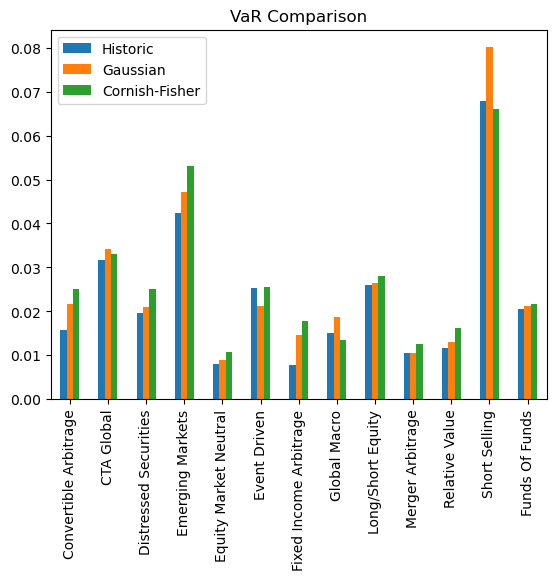

In [119]:
var_comparison.plot.bar(title="VaR Comparison")

In [140]:
r.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64